In [1]:
# --- CSS STYLE ---
from IPython.display import HTML, display
HTML("""<style>
th {
background-color:#ecc6d9;
}
td {
background-color:lavender;
}
</style>""")

<h1 style = "font-size: 80px; color:Purple; font-family:times new roman; font-style:italic;"><center>🏯 Anime Shows and Studios 🏯</center></h1>

***

![](https://images.unsplash.com/photo-1613376023733-0a73315d9b06?ixlib=rb-1.2.1&ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&auto=format&fit=crop&w=1740&q=80)

***

<h1 style = "font-size: 40px; color:purple; font-family:times new roman;">Forward</h1>
<p style="font-size:15px; font-family:verdana; line-height: 1.7em">
    Hi there 👋<br>
    This notebook is a combination of my love towards Anime and Data Visualization, an analysis on Anime Types, Studios, Genre and the overall story of Anime's legacy.<br>
    This Analysis is made with my passion for Data Science. If you find this notebook interesting, please give an upvote. Thank you!
</p>

<h1 style = "font-size: 40px; color:purple; font-family:times new roman;">Methodology</h1>
<p style="font-size:15px; font-family:verdana; line-height: 1.7em">
    I've built 4 Kaggle Notebooks and by now, I'm comfortable with Data Visualization with Matplotlib and Seaborn (all thanks to Kaggle's Data Visualization Course). But I never really got very good at Plotly. Which is why I polished my Plotly Express skills through this Notebook.<br>
    Idk why but lately I've been thinking to mix up my love for Data Visualization with Anime.<br>
    Hence, I searched for an Anime dataset on Kaggle. Luckily, I found the amazing Anime 2022 dataset which you can find by navigating to the Data tab above.<br>
    And here is my Notebook...✌️<br>
    Through this, I've solved problems like-
</p>
<ul style="font-size:15px; font-family:verdana; line-height: 1.7em">
    <li>What Anime are on the top?</li>
    <li>What is their type?</li>
    <li>How the Type and Rating is related to the Season?</li>
</ul>

<h1 style = "font-size: 40px; color:purple; font-family:times new roman;">Libraries and Settings</h1>

In [2]:
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
from plotly.subplots import make_subplots
from termcolor import colored
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [3]:
pio.templates.default = "simple_white"
antq_blue = "#336699"
antq_purple = "#ac39ac"
antq_red = "#e63900"
antq_orange = "#ff8c1a"
faded_grey = "#e6e6e6"
light_grey = "#d9d9d9"
heading_font = "Brush Script MT, Brush Script Std, cursive"
normal_font = "times new roman"
palette = px.colors.qualitative.Set2
palette_r = px.colors.qualitative.Set2_r
set1 = px.colors.qualitative.Set1
set3 = px.colors.qualitative.Set3
warnings.filterwarnings('ignore')

<h1 style = "font-size: 40px; color:purple; font-family:times new roman">Overview of the Dataset</h1>

In [4]:
#======Reading the csv file======
general = pd.read_csv("../input/anime-dataset-2022/Anime.csv")

#======Cleaning the Type columns
for i in range(len(general["Type"])) :
    general["Type"][i] = general["Type"][i].strip()
    
general.head()

,Rank,Name,Japanese_name,Type,Episodes,Studio,Release_season,Tags,Rating,Release_year,End_year,Description,Content_Warning,Related_Mange,Related_anime,Voice_actors,staff
0,1,Demon Slayer: Kimetsu no Yaiba - Entertainment...,Kimetsu no Yaiba: Yuukaku-hen,TV,NaN,ufotable,Fall,"Action, Adventure, Fantasy, Shounen, Demons, H...",4.60,2021.0,NaN,'Tanjiro and his friends accompany the Hashira...,Explicit Violence,Demon Slayer: Kimetsu no Yaiba,"Demon Slayer: Kimetsu no Yaiba, Demon Slayer: ...","Inosuke Hashibira : Yoshitsugu Matsuoka, Nezuk...","Koyoharu Gotouge : Original Creator, Haruo Sot..."
1,2,Fruits Basket the Final Season,Fruits Basket the Final,TV,13.0,TMS Entertainment,Spring,"Drama, Fantasy, Romance, Shoujo, Animal Transf...",4.60,2021.0,NaN,'The final arc of Fruits Basket.',"Emotional Abuse,, Mature Themes,, Physical Abu...","Fruits Basket, Fruits Basket Another","Fruits Basket 1st Season, Fruits Basket 2nd Se...","Akito Sohma : Maaya Sakamoto, Kyo Sohma : Yuum...","Natsuki Takaya : Original Creator, Yoshihide I..."
2,3,Mo Dao Zu Shi 3,The Founder of Diabolism 3,Web,12.0,B.C MAY PICTURES,NaN,"Fantasy, Ancient China, Chinese Animation, Cul...",4.58,2021.0,NaN,'The third season of Mo Dao Zu Shi.',NaN,Grandmaster of Demonic Cultivation: Mo Dao Zu ...,"Mo Dao Zu Shi 2, Mo Dao Zu Shi Q","Lan Wangji, Wei Wuxian, Jiang Cheng, Jin Guang...","Mo Xiang Tong Xiu : Original Creator, Xiong Ke..."
3,4,Fullmetal Alchemist: Brotherhood,Hagane no Renkinjutsushi: Full Metal Alchemist,TV,64.0,Bones,Spring,"Action, Adventure, Drama, Fantasy, Mystery, Sh...",4.58,2009.0,2010.0,"""The foundation of alchemy is based on the law...","Animal Abuse,, Mature Themes,, Violence,, Dome...","Fullmetal Alchemist, Fullmetal Alchemist (Ligh...","Fullmetal Alchemist: Brotherhood Specials, Ful...","Alphonse Elric : Rie Kugimiya, Edward Elric : ...","Hiromu Arakawa : Original Creator, Yasuhiro Ir..."
4,5,Attack on Titan 3rd Season: Part II,Shingeki no Kyojin Season 3: Part II,TV,10.0,WIT Studio,Spring,"Action, Fantasy, Horror, Shounen, Dark Fantasy...",4.57,2019.0,NaN,'The battle to retake Wall Maria begins now! W...,"Cannibalism,, Explicit Violence","Attack on Titan, Attack on Titan: End of the W...","Attack on Titan, Attack on Titan 2nd Season, A...","Armin Arlelt : Marina Inoue, Eren Jaeger : Yuu...","Hajime Isayama : Original Creator, Tetsurou Ar..."


<h2 style = "font-size: 40px; color:purple; font-family:times new roman; font-style: italic">Types of Anime</h2>

In [5]:
fig = px.scatter(general,
                    y="Rating", 
                    x="Release_year",
                    color = "Type",
                    color_discrete_sequence = palette,
                    hover_data = ["Name"]
)

fig.update_layout(
    hoverlabel=dict(
        bgcolor="#e6ccff",
        font_size=14
    ),
    font=dict(
        color = "Purple"
    )
)

fig.show()

<div style="color:white;
            display:fill;
            background-color:lavender;
            font-family:Verdana;
            line-height : 1.7em">
    <p style="padding: 10px;
              border-style : solid;
              border-width: thin;
              border-color: purple;
              color:purple;">
        📌 &nbsp;The above chart helps us to visualize the evolution of the Types thoughout the years.<br>
    As you can see, from 1907 to 1957, for 50 years, anime only had movies. Then TV Sp and TV Shows can out. And today, TV Anime Shows took over with highest ratings.
    </p>
</div>

In [6]:
type_list = list(general["Type"].unique())

type_values = []

for i in range(len(general["Type"].unique())) :
    type_values.append(general["Type"].value_counts().iloc[i])
    
fig = px.pie(values=type_values,
             names=general["Type"].unique(),
             
)

fig.update_traces(marker=dict(colors=palette),
                  hole = .3,
                  textposition='inside',
                  textinfo='percent+label'
)

fig.update_layout(
    annotations=[dict(text='Type', x=0.5, y=0.5, font_size=24, showarrow=False)],
    hoverlabel=dict(
        bgcolor="#e6ccff",
        font_size=14
    ),
    legend=dict(
        yanchor="top",
        y=0.90,
        xanchor="left",
        x=0.80
    ),
    font=dict(
        color = "purple"
    )
)

fig.show()

<h2 style = "font-size: 40px; color:purple; font-family:times new roman; font-style: italic">Top Rated Anime</h2>

In [7]:
general = general.sort_values(by='Rating', ascending = False)
top_50_rated = general.head(50)
top_20_rated = general.head(20)

fig = px.bar(top_20_rated,
                   y="Name",
                   x="Rating",
                   # orientation='h',
                   height=600,
                   labels={
                           "Name" : "Anime"
                          },
                   color = "Type",
                   color_discrete_sequence=palette,
                   orientation='h'
                  )

fig.update_traces(hovertemplate ='%{y}' + " : " + "%{x}", selector=dict(type="bar"))

fig.update_layout(
    title = "Top Rated Anime & Their Type",
    yaxis_title = "Anime",
    xaxis_range=[4.4,4.65],
    yaxis={'categoryorder':'total ascending'},
    hoverlabel=dict(
        bgcolor="#e6ccff",
        font_size=14
    ),
    legend=dict(
        yanchor="top",
        y=0.50,
        xanchor="left",
        x=0.80,
        bgcolor="#e6ccff",
        bordercolor="purple",
        borderwidth=1
    ),
    font=dict(
        color = "Purple"
    )
)

fig.show()

<div style="color:white;
            display:fill;
            background-color:lavender;
            font-family:Verdana;
            line-height : 1.7em">
    <p style="padding: 10px;
              border-style : solid;
              border-width: thin;
              border-color: purple;
              color:purple;">
        📌 &nbsp;<b>Fruits Basket</b> and <b>Demon Slayer</b> just clapped. More surprisingly, a Web Anime is listed in the Top 3, <b>Mo Dao Zu Shi</b>, which also managed to get better rating than Fullmetal Alchemist - Brotherhood.
    </p>
</div>

<center><img src = "https://otakukart.com/wp-content/uploads/2021/05/main-characters-3.jpg"></center>

<h2 style = "font-size: 40px; color:purple; font-family:times new roman; font-style: italic">Top Rated Anime w.r.t their Type</h2>

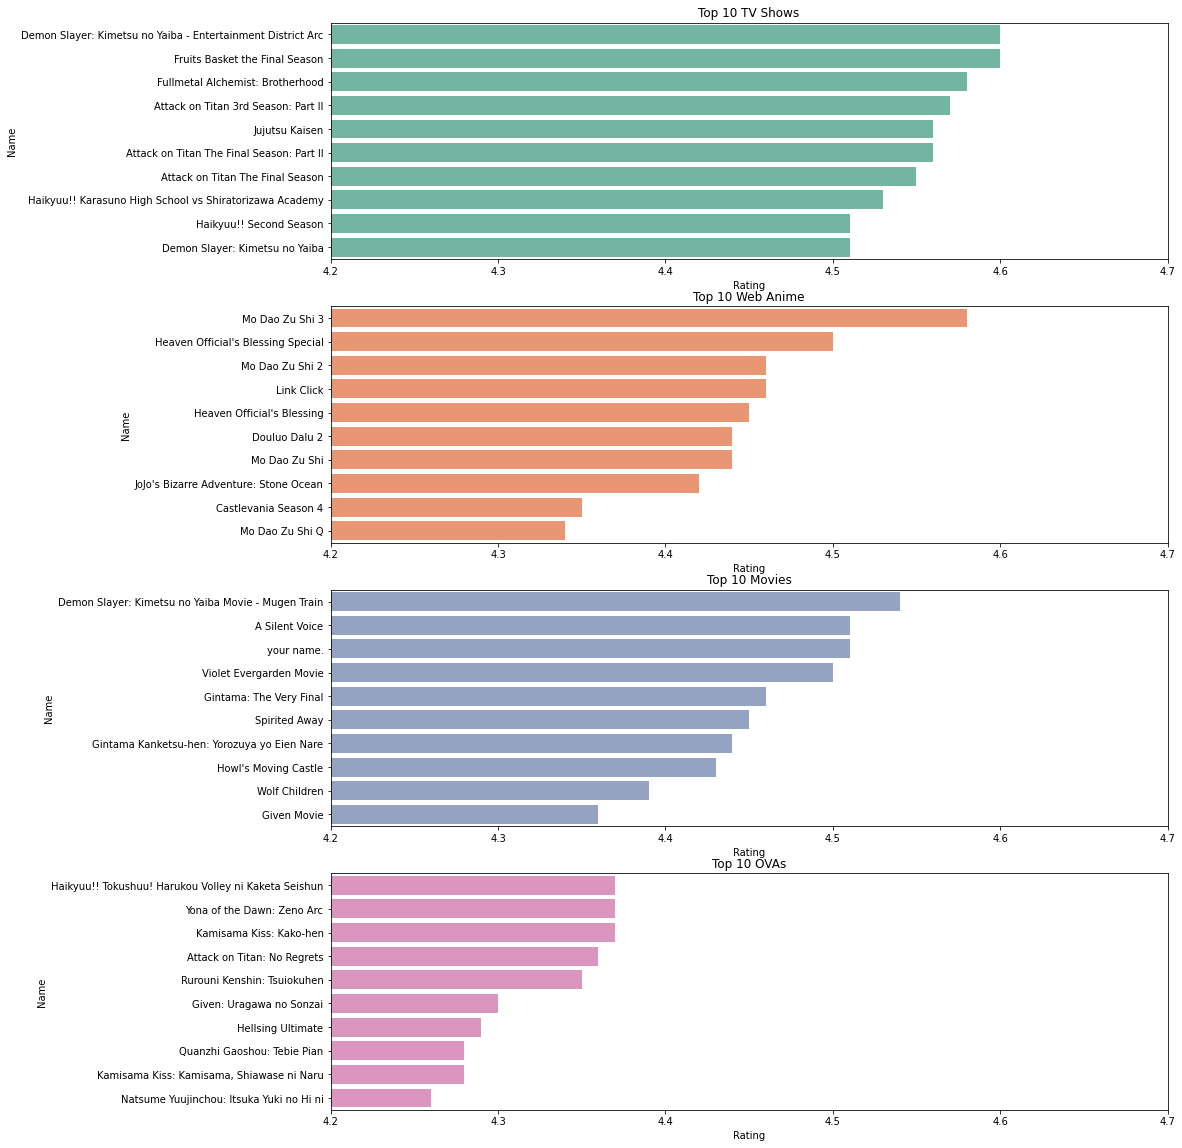

In [8]:
tv_shows = general[general["Type"] == "TV"]
top_10_tv_shows = tv_shows.sort_values(by='Rating', ascending = False).head(10)

web_anime = general[general["Type"] == "Web"]
top_10_web_anime = web_anime.sort_values(by='Rating', ascending = False).head(10)

movies = general[general["Type"] == "Movie"]
top_10_movies = movies.sort_values(by='Rating', ascending = False).head(10)

ova = general[general["Type"] == "OVA"]
top_10_ova = ova.sort_values(by='Rating', ascending = False).head(10)

fig, axes = plt.subplots(4, 1, figsize=(15, 20))

tv_plot = sns.barplot(ax=axes[0], y=top_10_tv_shows["Name"], x=top_10_tv_shows["Rating"], palette=["#66C2A5"])
axes[0].set_title("Top 10 TV Shows")

web_plot = sns.barplot(ax=axes[1], y=top_10_web_anime["Name"], x=top_10_web_anime["Rating"], palette=["#FC8D62"])
axes[1].set_title("Top 10 Web Anime")

movies_plot = sns.barplot(ax=axes[2], y=top_10_movies["Name"], x=top_10_movies["Rating"], palette=["#8DA0CB"])
axes[2].set_title("Top 10 Movies")

ova_plot = sns.barplot(ax=axes[3], y=top_10_ova["Name"], x=top_10_ova["Rating"], palette=["#E78AC3"])
axes[3].set_title("Top 10 OVAs")

tv_plot.set(xlim=(4.2, 4.7))
web_plot.set(xlim=(4.2, 4.7))
movies_plot.set(xlim=(4.2, 4.7))
ova_plot.set(xlim=(4.2, 4.7))

plt.show()

<h2 style = "font-size: 40px; color:purple; font-family:times new roman; font-style: italic">Current Best Studios</h2>

In [9]:
best_studios_df = general[general.Studio.isin(["ufotable", "MAPPA", "Production I.G", "Kyoto Animation"])]

fig = px.line(x = [i for i in range(2012, 2022)],
                y = [[best_studios_df[(best_studios_df.Studio == "ufotable") & (best_studios_df.Release_year == j)].Rating.mean() for j in range(2012, 2022)],
                        [best_studios_df[(best_studios_df.Studio == "MAPPA") & (best_studios_df.Release_year == j)].Rating.mean() for j in range(2012, 2022)],
                        [best_studios_df[(best_studios_df.Studio == "Production I.G") & (best_studios_df.Release_year == j)].Rating.mean() for j in range(2012, 2022)],
                        [best_studios_df[(best_studios_df.Studio == "Kyoto Animation") & (best_studios_df.Release_year == j)].Rating.mean() for j in range(2012, 2022)]
                ],
                labels={"variable": "Studios",
                        "value" : "Rating"
                     },
                markers=True,
                line_shape='spline',
                color_discrete_sequence=palette,
)

fig.update_layout(
    title = "Best Studios and their Ratings over the years",
    xaxis_title = "Year",
    hoverlabel=dict(
        font_size=14
    ),
    font=dict(
        color = "purple",
        size = 14
    ),
)

fig.update_traces(
                  selector=dict(type='scatter'),
                  marker=dict(size=8,
                              line=dict(width=2)
                             )
)

newnames = {'wide_variable_0': 'ufotable',
            'wide_variable_1': 'MAPPA',
            'wide_variable_2': 'Production I.G',
            'wide_variable_3': 'Kyoto Animation'
}

fig.for_each_trace(lambda t: t.update(name = newnames[t.name],
                                      legendgroup = newnames[t.name],
                                      hovertemplate = t.hovertemplate.replace(t.name, newnames[t.name])
                                     )
                  )

fig.show()

<div style="color:white;
            display:fill;
            background-color:lavender;
            font-family:Verdana;
            line-height : 1.7em">
    <p style="padding: 10px;
              border-style : solid;
              border-width: thin;
              border-color: purple;
              color:purple;">
        📌 &nbsp;ufotable clapped.<br>ufotable and MAPPA are growing their ratings. On the other hand, Kyoto Animation and Production I.G (one of the most anime producing studio) are declining their ratings.<br>
        Right now, the top 2 studios are <b>ufotable</b> and <b>MAPPA</b>.<br>
        Let's analyze them.
        But before that, I just wanna say,
        Thank You MAPPA 😜
    </p>
</div>

<center><img src="https://pics.me.me/ufotable-mappa-white-fox-bones-ac-staff-a-i-pictures-sasuga-63851046.png"></center>

<h3 style = "font-size: 40px; color:purple; font-family:times new roman; font-style: italic">ufotable and MAPPA</h3>

In [10]:

fig = px.funnel(top_20_rated[top_20_rated.Studio.isin(["ufotable", "MAPPA"])],
                x='Rank', 
                y='Name',
                color = "Studio",
                color_discrete_sequence=palette
)

fig.update_layout(
    title = "ufotable and MAPPA within the Top 20 Animes",
    yaxis_title = "Anime",
    yaxis={'categoryorder':'total ascending'},
    hoverlabel=dict(
        bgcolor="#e6ccff",
        font_size=14
    ),
    legend=dict(
        bgcolor="#e6ccff",
        bordercolor="purple",
        borderwidth=1
    ),
    font=dict(
        color = "Purple"
    )
)

fig.show()

<div style="color:white;
            display:fill;
            background-color:lavender;
            font-family:Verdana;
            line-height : 1.7em">
    <p style="padding: 10px;
              border-style : solid;
              border-width: thin;
              border-color: purple;
              color:purple;">
        📌 &nbsp;ufotable's truimph card is Demon Slayer. And for MAPPA, it's Attack on Titan and Jujutsu Kaisen
    </p>
</div>

<center><img src="https://shogi-pineapple.com/wp-content/uploads/2021/11/1638283511_Attack-on-Titan-Jujutsu-Kaisen-Demon-Slayer-Discover-the-best-selling.jpeg"></center

In [11]:
u_m_df = general[general.Studio.isin(["ufotable", "MAPPA"])]

fig = px.bar(u_m_df,
        x = u_m_df.Type.value_counts().drop("Other").index,
        y = [u_m_df.Type[u_m_df.Studio == "ufotable"].value_counts(),
                u_m_df.Type[u_m_df.Studio == "MAPPA"].value_counts().drop("Other")
        ],
        #width = 800,
        barmode='group',
        labels={"variable": "Studios",
                "x" : "Type",
                "value" : "No. of animes"
        },
        color_discrete_map={'wide_variable_0' : palette[0], 'wide_variable_1' : palette[1]}
)

newnames = {'wide_variable_0': 'ufotable',
            'wide_variable_1': 'MAPPA'
}

fig.for_each_trace(lambda t: t.update(name = newnames[t.name],
                                      legendgroup = newnames[t.name],
                                      hovertemplate = t.hovertemplate.replace(t.name, newnames[t.name])
                                     )
                  )

fig.update_layout(
    title = "ufotable vs MAPPA",
    hoverlabel=dict(
        bgcolor="lavender",
        font_size=14
    ),
    font=dict(
        color = "purple",
        size = 14
    ),
    yaxis={"visible":False}
)

fig.show()

<div style="color:white;
            display:fill;
            background-color:lavender;
            font-family:Verdana;
            line-height : 1.7em">
    <p style="padding: 10px;
              border-style : solid;
              border-width: thin;
              border-color: purple;
              color:purple;">
        📌 &nbsp;MAPPA's mainly focused on TV Shows. On the other hand, ufotable is focused in everything according to the trend.
    </p>
</div>

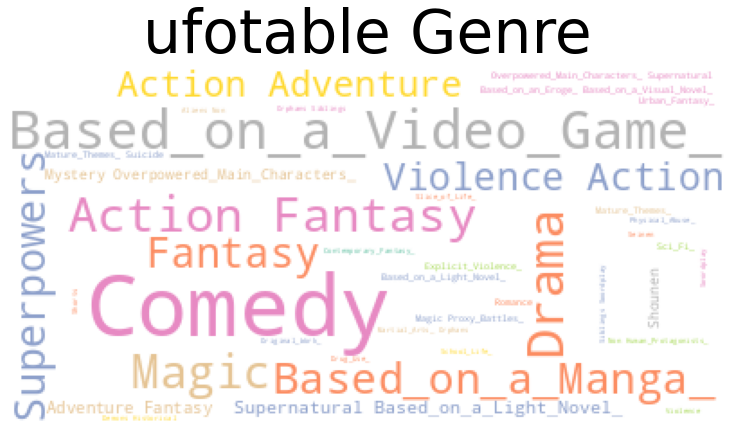

In [12]:
u_genre = ""
general.Tags[general.Studio == "ufotable"].unique()

for i in list(general.Tags[general.Studio == "ufotable"]) :
    j = [k.strip() for k in i.split(",")]
    for a in j :
        if len(a.split()) > 1 :
            s = ""
            for b in a.split() :
                s += b + "_"
            u_genre += s + " "
        else :
            u_genre += a + " "

wc = WordCloud(background_color ='white', colormap = "Set2").generate(u_genre)

plt.figure(figsize = (10, 10), facecolor = None)
plt.imshow(wc)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.title("ufotable Genre", fontsize=60)
 
plt.show()

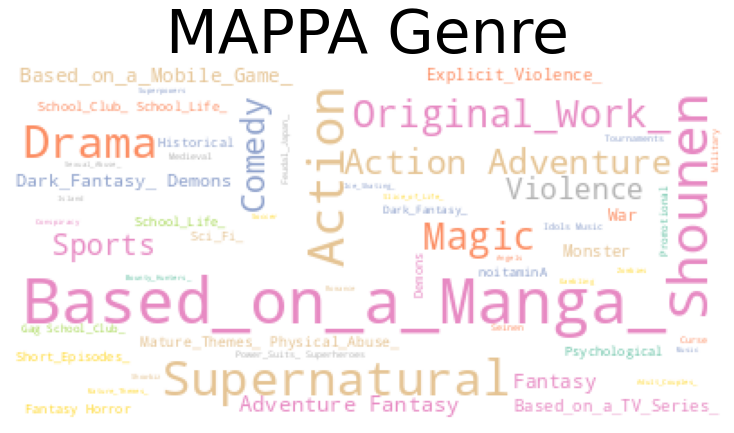

In [13]:
m_genre = ""
general.Tags[general.Studio == "MAPPA"].unique()

for i in list(general.Tags[general.Studio == "MAPPA"]) :
    j = [k.strip() for k in i.split(",")]
    for a in j :
        if len(a.split()) > 1 :
            s = ""
            for b in a.split() :
                s += b + "_"
            m_genre += s + " "
        else :
            m_genre += a + " "

wc = WordCloud(background_color ='white', colormap = "Set2").generate(m_genre)

plt.figure(figsize = (10, 10), facecolor = None)
plt.imshow(wc)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.title("MAPPA Genre", fontsize=60)
 
plt.show()

<h2 style = "font-size: 40px; color:purple; font-family:times new roman; font-style: italic">Studios which produced most number of Animes</h2>

In [14]:
toei = general[(general["Studio"] == "Toei Animation") & ((general.Release_year <= 2021) & (general.Release_year >= 2012))].sort_values(by = "Release_year", ascending = False)
sunrise = general[(general["Studio"] == "Sunrise") & ((general.Release_year <= 2021) & (general.Release_year >= 2012))].sort_values(by = "Release_year", ascending = False)
jc = general[(general["Studio"] == "J.C.Staff") & ((general.Release_year <= 2021) & (general.Release_year >= 2012))].sort_values(by = "Release_year", ascending = False)
tms = general[(general["Studio"] == "TMS Entertainment") & ((general.Release_year <= 2021) & (general.Release_year >= 2012))].sort_values(by = "Release_year", ascending = False)
madhouse = general[(general["Studio"] == "MADHOUSE") & ((general.Release_year <= 2021) & (general.Release_year >= 2012))].sort_values(by = "Release_year", ascending = False)
ig = general[(general["Studio"] == "Production I.G") & ((general.Release_year <= 2021) & (general.Release_year >= 2012))].sort_values(by = "Release_year", ascending = False)

t_yearly_ratings = []
s_yearly_ratings = []
jc_yearly_ratings = []
tms_yearly_ratings = []
m_yearly_ratings = []
ig_yearly_ratings = []

for i in range(2012, 2022) :
    t_yearly_ratings.append(toei[toei.Release_year == i]["Rating"].mean())
    s_yearly_ratings.append(sunrise[sunrise.Release_year == i]["Rating"].mean())
    jc_yearly_ratings.append(jc[jc.Release_year == i]["Rating"].mean())
    tms_yearly_ratings.append(tms[tms.Release_year == i]["Rating"].mean())
    m_yearly_ratings.append(madhouse[madhouse.Release_year == i]["Rating"].mean())
    ig_yearly_ratings.append(ig[ig.Release_year == i]["Rating"].mean())

fig = px.line(toei,
                x = [i for i in range(2012, 2022)], 
                y = [t_yearly_ratings, 
                        s_yearly_ratings,
                        jc_yearly_ratings, 
                        tms_yearly_ratings,
                        m_yearly_ratings,
                        ig_yearly_ratings
                    ],
                labels={"variable": "Studios",
                     },
                markers=True,
                line_shape='spline',
                color_discrete_sequence=palette,
)

# fig.update_traces(hovertemplate ='%{x}' + " : " + "%{y}", selector=dict(type="line"))

# fig.update_layout(yaxis_range = [min(l) - 0.1, max(l)])

fig.update_layout(
    title = "Studios and their Ratings over the years",
    yaxis_title = "Rating",
    xaxis_title = "Year",
    yaxis_range = [3.25, 4.25],
    hoverlabel=dict(
        bgcolor="lavender",
        font_size=14
    ),
    font=dict(
        color = "purple",
        size = 14
    ),
)

fig.update_traces(
                  selector=dict(type='scatter'),
                  marker=dict(size=8,
                              line=dict(width=2)
                             )
)

#fig.update_layout(updatemenus=[yanchor = ["hvh", "jbjb"]])

newnames = {'wide_variable_0': 'Toei Animation',
            'wide_variable_1': 'Sunrise',
            'wide_variable_2': 'J.C.Staff',
            'wide_variable_3': 'TMS Entertainment',
            'wide_variable_4': 'MADHOUSE',
            'wide_variable_5': 'Production I.G'
}

fig.for_each_trace(lambda t: t.update(name = newnames[t.name],
                                      legendgroup = newnames[t.name],
                                      hovertemplate = t.hovertemplate.replace(t.name, newnames[t.name])
                                     )
                  )

fig.update_yaxes(type="linear")

fig.show()

<div style="color:white;
            display:fill;
            background-color:lavender;
            font-family:Verdana;
            line-height : 1.7em">
    <p style="padding: 10px;
              border-style : solid;
              border-width: thin;
              border-color: purple;
              color:purple;">
        📌 &nbsp;<b>TMS Entertainment</b> and Production <b>I.G</b> accounts most animes in the history.<br>
        Let's analyze them.
    </p>
</div>

<h2 style = "font-size: 40px; color:purple; font-family:times new roman; font-style: italic">TMS Entertainment and Production I.G</h2>

In [15]:

fig = px.funnel(top_50_rated[top_50_rated.Studio.isin(["TMS Entertainment", "Production I.G"])],
                x='Rank', 
                y='Name',
                color = "Studio",
                color_discrete_sequence=palette
)

fig.update_layout(
    title = "TMS Entertainment and Production I.G within the Top 50 Animes",
    yaxis_title = "Anime",
    yaxis={'categoryorder':'total ascending'},
    hoverlabel=dict(
        bgcolor="#e6ccff",
        font_size=14
    ),
    font=dict(
        color = "Purple"
    )
)

fig.show()

<div style="color:white;
            display:fill;
            background-color:lavender;
            font-family:Verdana;
            line-height : 1.7em">
    <p style="padding: 10px;
              border-style : solid;
              border-width: thin;
              border-color: purple;
              color:purple;">
        📌 &nbsp;TMS's truimph card is Fruits Basket. And for Production I.G, it's Haikyuu.
    </p>
</div>

<center><img src = "https://i.ibb.co/25sPQt7/Be-Funky-collage.jpg"></center>

In [16]:
fig = px.bar(general,
        x = general.Type.value_counts().index,
        y = [general[general.Studio == "TMS Entertainment"].Type.value_counts(), general[general.Studio == "Production I.G"].Type.value_counts()],
        #width = 800,
        barmode='group',
        labels={"variable": "Studios",
                "x" : "Type",
                "value" : "No. of animes"
        },
        color_discrete_map={'wide_variable_0' : palette[0], 'wide_variable_1' : palette[1]}
)

newnames = {'wide_variable_0': 'TMS Entertainment',
            'wide_variable_1': 'Production I.G'
}

fig.for_each_trace(lambda t: t.update(name = newnames[t.name],
                                      legendgroup = newnames[t.name],
                                      hovertemplate = t.hovertemplate.replace(t.name, newnames[t.name])
                                     )
                  )

fig.update_layout(
    title = "TMS Entertainment vs Production I.G",
    hoverlabel=dict(
        bgcolor="lavender",
        font_size=14
    ),
    font=dict(
        color = "purple",
        size = 14
    ),
    yaxis={"visible":False}
)

fig.show()

<div style="color:white;
            display:fill;
            background-color:lavender;
            font-family:Verdana;
            line-height : 1.7em">
    <p style="padding: 10px;
              border-style : solid;
              border-width: thin;
              border-color: purple;
              color:purple;">
        📌 &nbsp;TMS's mainly focused on TV Shows and Movies. On the other hand, Production I.G is focused in everything according to the trend.
    </p>
</div>

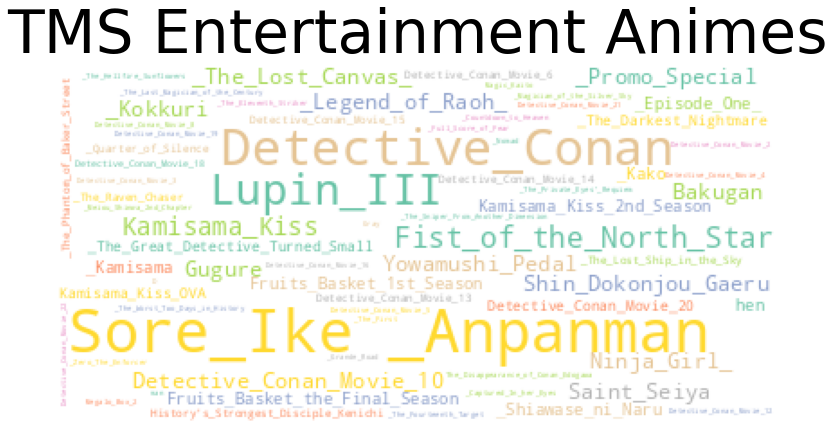

In [17]:
tms_names = ""
for i in range(len(general[general.Studio == "TMS Entertainment"].index) // 2) :
    if len(general[general.Studio == "TMS Entertainment"].Name.iloc[i].split()) > 1 :
        tms_names += "_".join(general[general.Studio == "TMS Entertainment"].Name.iloc[i].split()) + " "
    else :
        tms_names += general[general.Studio == "TMS Entertainment"].Name.iloc[i] + " "

wc = WordCloud(background_color ='white', colormap = "Set2").generate(tms_names)

plt.figure(figsize = (10, 10), facecolor = None)
plt.imshow(wc)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.title("TMS Entertainment Animes", fontsize=60)
 
plt.show()

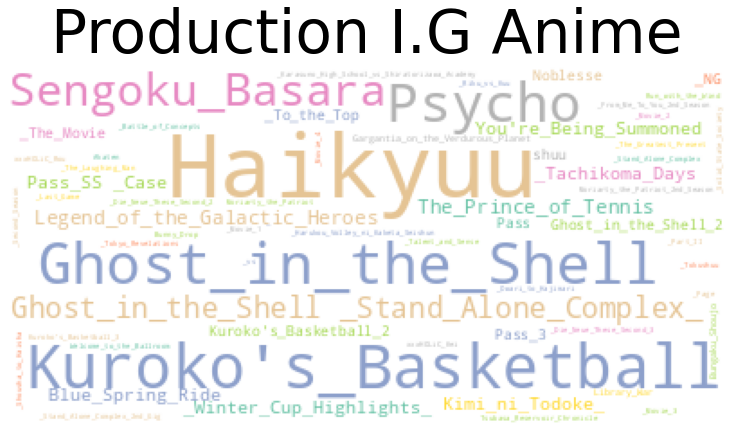

In [18]:
pig_names = ""
for i in range(len(general[general.Studio == "Production I.G"].index) // 2) :
    if len(general[general.Studio == "Production I.G"].Name.iloc[i].split()) > 1 :
        pig_names += "_".join(general[general.Studio == "Production I.G"].Name.iloc[i].split()) + " "
    else :
        pig_names += general[general.Studio == "Production I.G"].Name.iloc[i] + " "

wc = WordCloud(background_color ='white', colormap = "Set2").generate(pig_names)

plt.figure(figsize = (10, 10), facecolor = None)
plt.imshow(wc)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.title("Production I.G Anime", fontsize=60)
 
plt.show()

<h1 style = "font-size: 40px; color:purple; font-family:times new roman">Outro</h1>

<p  style="font-size:20px; color : blue; font-family:time new roman; line-height: 1.5em">
    Thanks for checking out my notebook.<br>
    Now I think I'm comfortable with Plotly Express.<br>
    <br>
    I'll be performing regularly on this notebook on anime as I try scrap some more data to solve some more problems.<br>
    Thanks again. Hope you enjoyed 💜<br>
</p>